# ÊïôËÇ≤Êï∏Êìö‰∏≠ÁöÑÈóúÈçµÂõ†Á¥†Êé¢Á¥¢Ôºö‰ª•Â§ßÂ≠∏ÊéíÂêçÁÇ∫‰æã Exploring Key Factors in Educational Data: A Case Study on University Rankings

- Group Number:  6

- Name: ÂºµËÇ≤‰∏û, ÂºµÂ≠óÈùí, Âë®ÂßøÂ¶§, ÈªÉË©≥Ë´∫, Duong Van Nhat Quang
- Student ID: 113598043, 113598032, 113598090, 113598091, 113998411

## 0. Ë≥áÊñôÈ†êËôïÁêÜ

In [1]:
!pip install wordcloud umap-learn deepl statsmodels
!pip install -U gdown langchain langchain-community chromadb wikipedia sentence-transformers

  Using cached scipy-1.15.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.9/9.9 MB 2.1 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.1/11.1 MB 3.7 MB/s eta 0:00:00a 0:00:01
Using cached scipy-1.15.3-cp311-cp311-macosx_14_0_arm64.whl (22.4 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.2/26.2 MB 7.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached filelock-3.18.0-py3-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wikipedia
import gdown
import statsmodels.api as sm
import os

from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from umap import UMAP
from wordcloud import WordCloud
from langchain.document_loaders import DataFrameLoader
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document
from langchain_community.embeddings import SentenceTransformerEmbeddings

/opt/miniconda3/envs/Data_Science/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Google Drive Download Dataset

file_id = "1wUHPpHnev2A7zLMzlCS8etBQ2Hp2F1tL"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "cwurData_2014_2015.csv", quiet=False)

cwur_df = pd.read_csv("cwurData_2014_2015.csv")

Downloading...
From: https://drive.google.com/uc?id=1wUHPpHnev2A7zLMzlCS8etBQ2Hp2F1tL
To: /Users/ryan/Documents/NTUT/NTUT-CSIE-Master-Course/113-2/Data-Science-Principles-with-Applications-on-Educational-Data/Final/cwurData_2014_2015.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 171k/171k [00:00<00:00, 6.13MB/s]


## 1. Ë´ñÊñáÂºïÁî®ÈáèÊòØÂê¶ÂΩ±Èüø‰∏ñÁïåÊéíÂêçÔºü
- ÂïèÈ°åË™™ÊòéÔºöË¢´ÂºïÁî®Ë∂äÂ§öÔºå‰∏ñÁïåÊéíÂêçÊòØÂê¶Ë∂äÂâçÈù¢Ôºü
- ÂàÜÊûêÊñπÊ≥ïÔºöÁõ∏ÈóúÊÄßÂàÜÊûê + Á∑öÊÄßÂõûÊ≠∏

In [ ]:
X = cwur_df[['citations']]  # citation ÊéíÂêçÊï∏Â≠óË∂äÂ∞èË°®Á§∫ÂºïÁî®Ë∂äÂ§ö
y = cwur_df['world_rank']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Regression Equation: world_rank = {model.intercept_:.2f} + {model.coef_[0]:.2f} * citations")
print(f"R^2: {r2:.2f}")

Regression Equation: world_rank = 72.71 + 0.95 * citations
R^2: 0.68


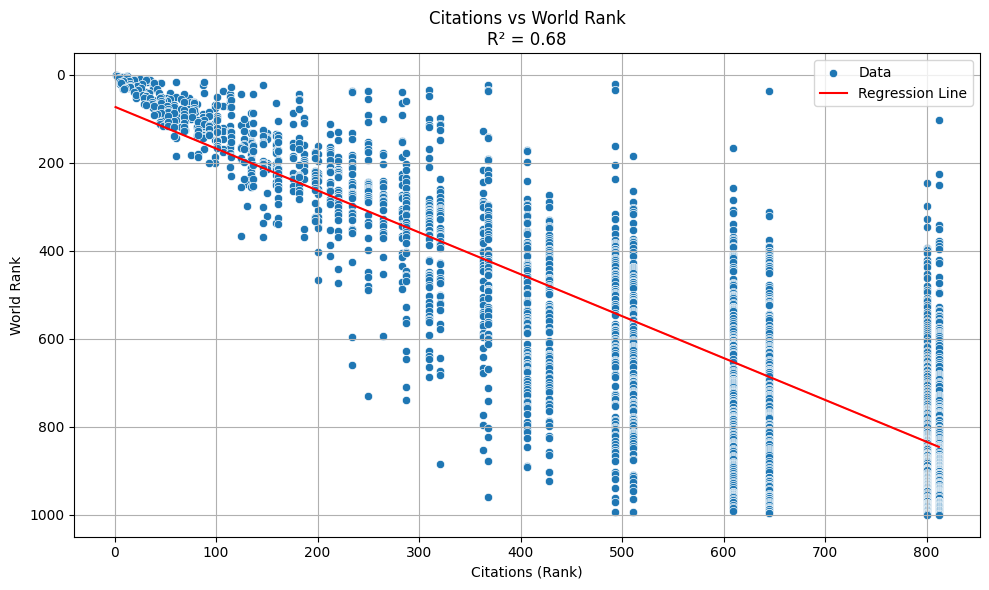

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='citations', y='world_rank', data=cwur_df, label='Data')
sns.lineplot(x=cwur_df['citations'], y=y_pred, color='red', label='Regression Line')
plt.gca().invert_yaxis()  # ÊéíÂêçË∂äÂ∞èË∂äÂ•Ω
plt.title(f'Citations vs World Rank\nR¬≤ = {r2:.2f}')
plt.xlabel('Citations (Rank)')
plt.ylabel('World Rank')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Baseline univariate model: using only citations
y = cwur_df['world_rank']
X_base = sm.add_constant(cwur_df[['citations']])
model_base = sm.OLS(y, X_base).fit()
r2_base = model_base.rsquared

# Try adding other variables to identify the one that increases R¬≤ the most.
candidate_vars = [
    'quality_of_faculty', 'alumni_employment', 'patents',
    'publications', 'influence', 'broad_impact', 'quality_of_education',
    'national_rank'
]
r2_gains = []

for var in candidate_vars:
    X = sm.add_constant(cwur_df[['citations', var]])
    model = sm.OLS(y, X).fit()
    r2_gain = model.rsquared - r2_base
    r2_gains.append((var, r2_gain))

# Sort and convert into a data table.
r2_gains_sorted = sorted(r2_gains, key=lambda x: x[1], reverse=True)
df_r2_gains = pd.DataFrame(r2_gains_sorted, columns=['Variable', 'R¬≤ Gain'])

print(df_r2_gains)

               Variable   R¬≤ Gain
0          broad_impact  0.210599
1          publications  0.172118
2             influence  0.122170
3               patents  0.060609
4     alumni_employment  0.059113
5  quality_of_education  0.032573
6    quality_of_faculty  0.018750
7         national_rank  0.006948


## 2. Âì™ÂÄãÊåáÊ®ôÊúÄÂΩ±Èüø‰∏ñÁïåÊéíÂêç
- ÂïèÈ°åË™™ÊòéÔºöÊïôÂ≠∏ÂìÅË≥™„ÄÅÂ∏´Ë≥á„ÄÅÂºïÁî®Èáè„ÄÅÂ∞àÂà©ÔºåË™∞ÊúÄÂΩ±ÈüøÊéíÂêçÔºü
- ÂàÜÊûêÊñπÊ≥ïÔºöÈóú‰øÇÊÄßÂàÜÊûêÔºàÈóú‰øÇÊ¨äÈáçÔºâ

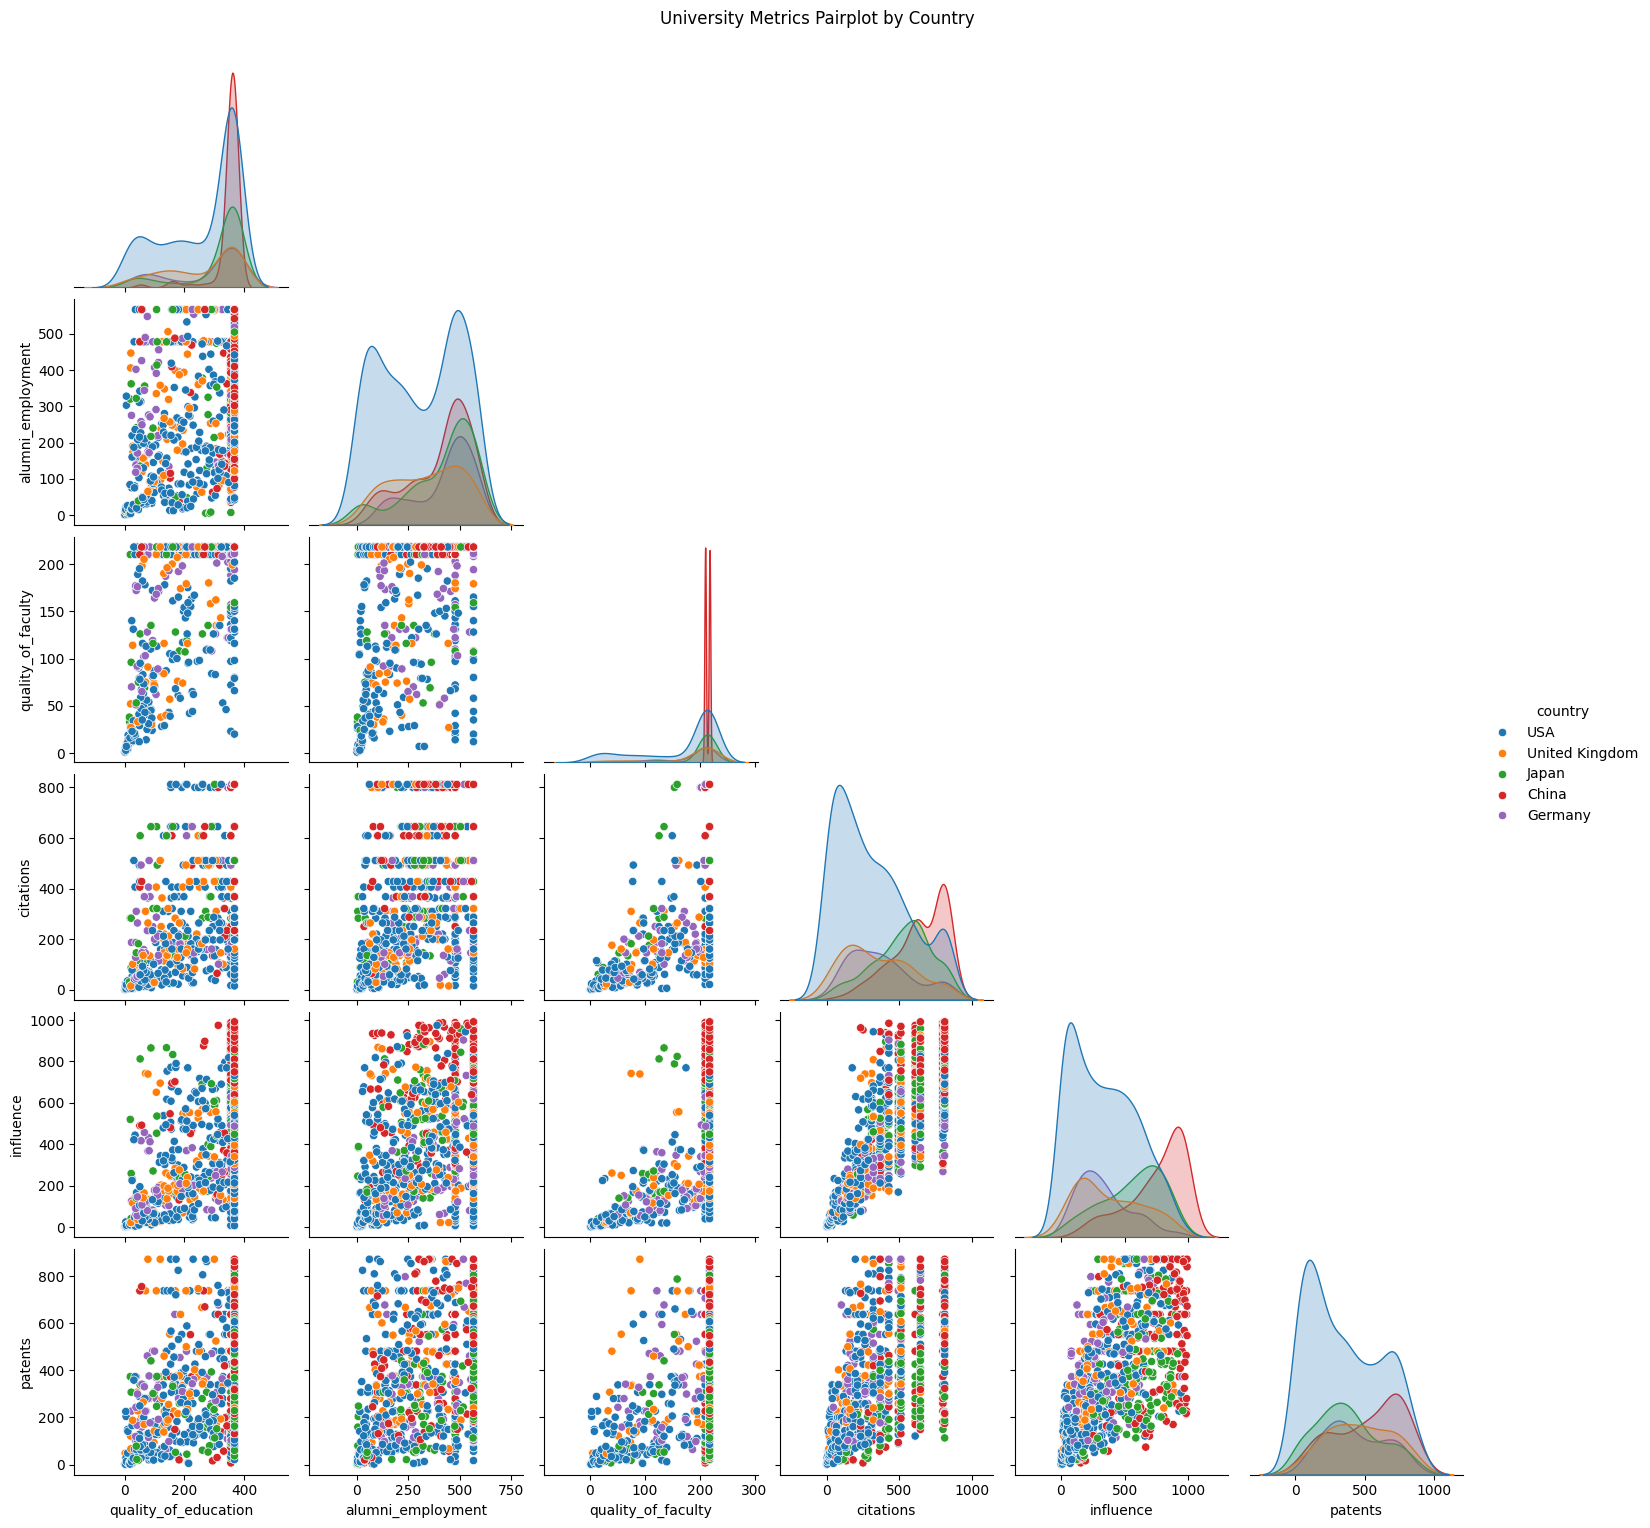

In [ ]:
# Select the indicators to analyze and limit to the top 30 countries (to avoid too many colors).
top_countries = cwur_df['country'].value_counts().head(5).index.tolist()
filtered_df = cwur_df[cwur_df['country'].isin(top_countries)]

# Select the required columns and set the HUE.
selected_cols = ['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'citations', 'influence', 'patents', 'country']

# Keep only the data for the selected columns.
plot_df = filtered_df[selected_cols].dropna()

# Plot the pairplot
sns.pairplot(plot_df, hue='country', corner=True)
plt.suptitle("University Metrics Pairplot by Country", y=1.02)
plt.show()


## 3. Ê†°ÂèãÂ∞±Ê•≠ÂäõÊòØÂê¶Êé®ÂãïÂæóÂàÜÔºü
- ÂïèÈ°åË™™ÊòéÔºöÊúâÈ´òÂ∞±Ê•≠ÂäõÁöÑÂ≠∏Ê†°ÔºåÊòØÂê¶ÂæóÂàÜ‰πüÊúÉÈ´òÔºü
- ÂàÜÊûêÊñπÊ≥ïÔºöÁõ∏ÈóúÊÄßÂàÜÊûê + ÂõûÊ≠∏

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')
       alumni_employment        score
count        2000.000000  2000.000000
mean          385.263500    47.067630
std           171.874782     6.590461
min             1.000000    44.020000
25%           250.750000    44.440000
50%           478.000000    44.960000
75%           500.250000    46.812500
max           567.000000   100.000000


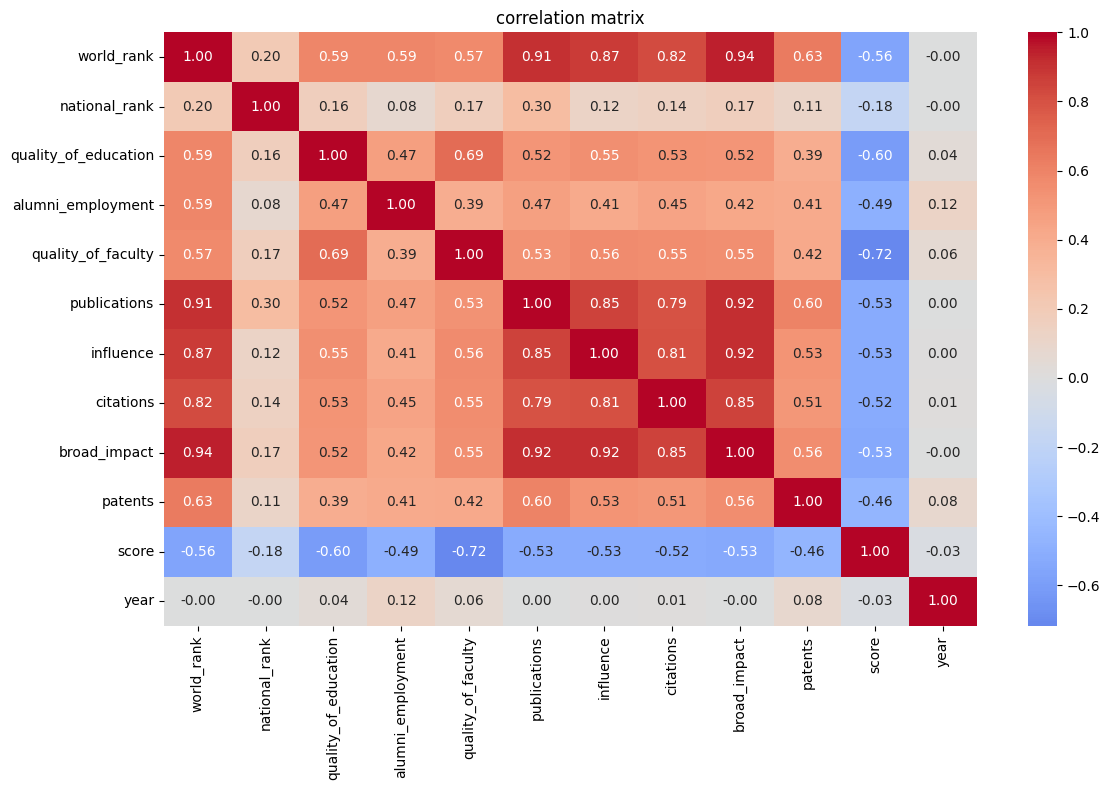


 multivariate linear regression analysis result:
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     408.8
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        14:27:11   Log-Likelihood:                -5718.1
No. Observations:                2000   AIC:                         1.145e+04
Df Residuals:                    1992   BIC:                         1.150e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

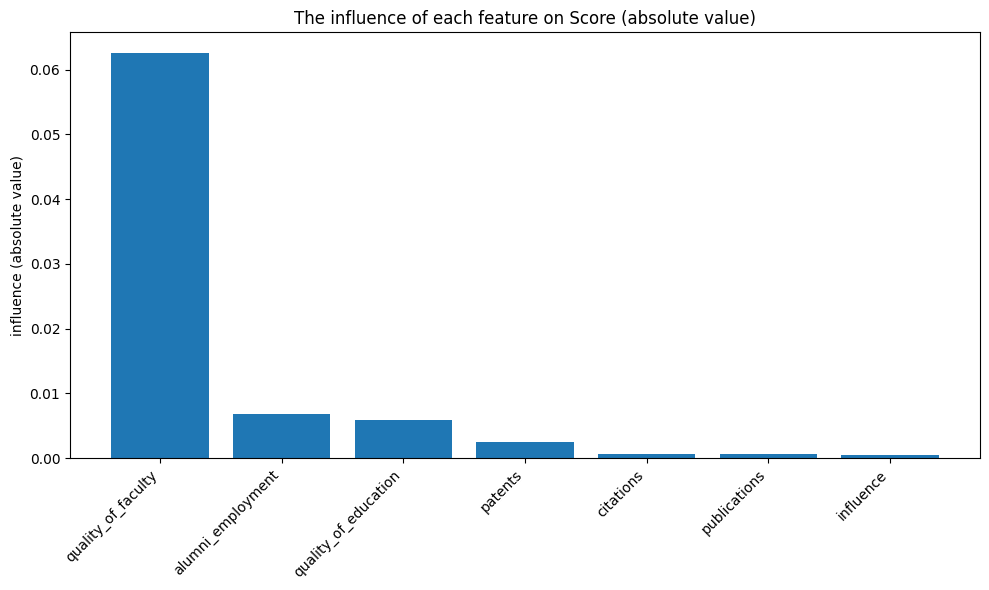


ÂêÑÁâπÂæµÁöÑÂΩ±ÈüøÁ®ãÂ∫¶ (ÊåâÁµïÂ∞çÂÄºÊéíÂ∫è)Ôºö
quality_of_faculty: -0.063 (ÁµïÂ∞çÂÄº: 0.063)
alumni_employment: -0.007 (ÁµïÂ∞çÂÄº: 0.007)
quality_of_education: -0.006 (ÁµïÂ∞çÂÄº: 0.006)
patents: -0.003 (ÁµïÂ∞çÂÄº: 0.003)
citations: -0.001 (ÁµïÂ∞çÂÄº: 0.001)
publications: -0.001 (ÁµïÂ∞çÂÄº: 0.001)
influence: -0.000 (ÁµïÂ∞çÂÄº: 0.000)


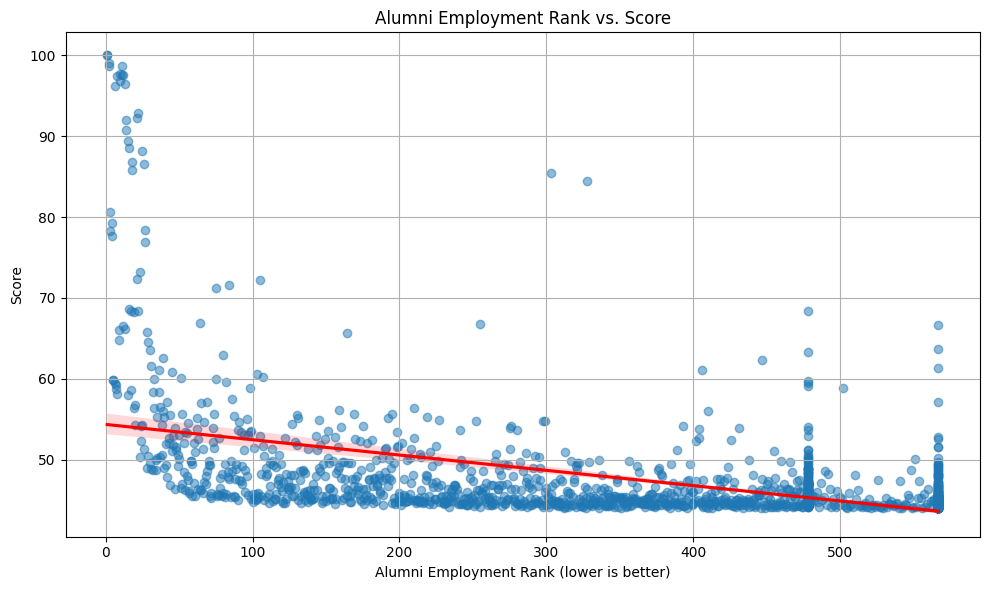

ÁöÆÁàæÊ£ÆÁõ∏Èóú‰øÇÊï∏: 87.933
p-value: 0.00000


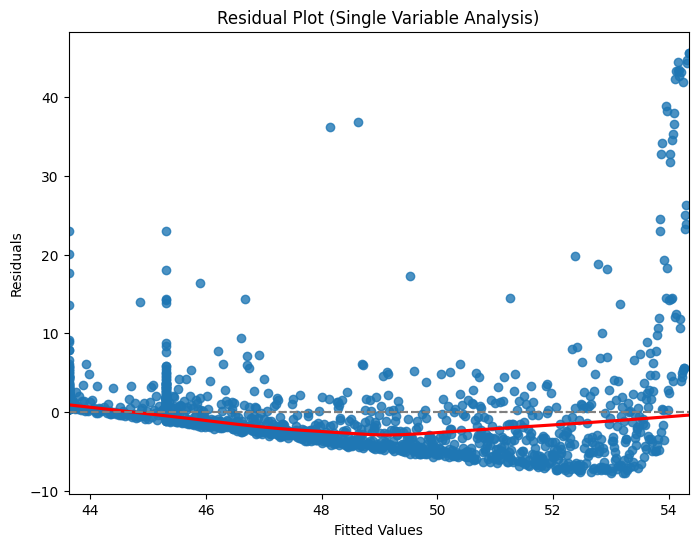

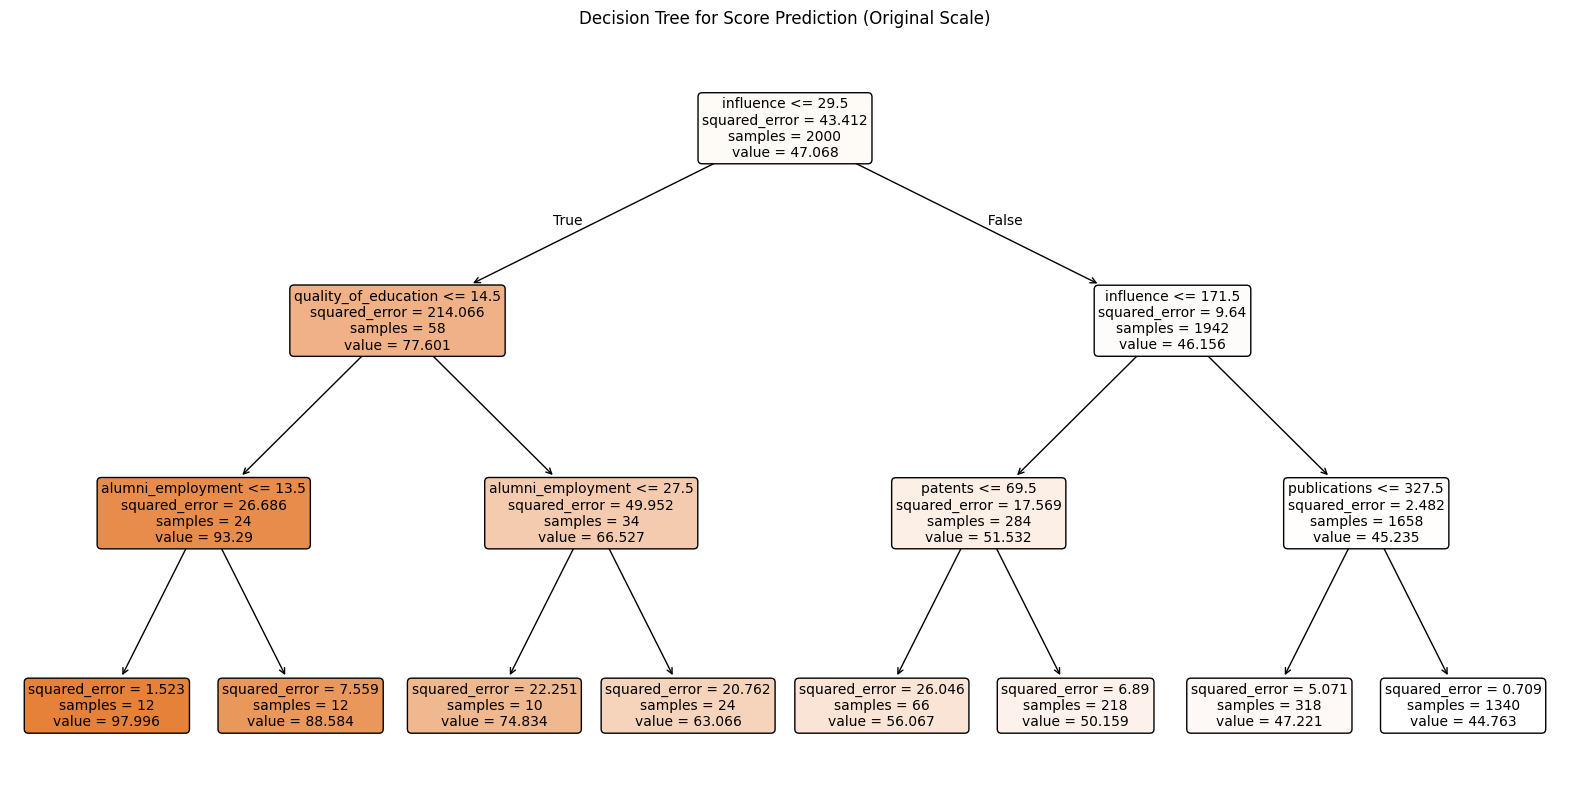

In [ ]:
# Check the columns and data.
print(cwur_df.columns)
print(cwur_df[['alumni_employment', 'score']].describe())

# Select the features to analyze.
features = ['quality_of_education', 'quality_of_faculty', 'alumni_employment',
           'publications', 'influence', 'citations', 'patents', 'score']

# Calculate the correlation matrix.
correlation_matrix = cwur_df[features].corr()

df_filtered = cwur_df[cwur_df['year'].isin([2014, 2015])]
numeric_df = df_filtered.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('correlation matrix')
plt.tight_layout()
plt.show()

# All features except for the score.
X = cwur_df[features[:-1]]
y = cwur_df['score']

# Add the intercept term
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\n multivariate linear regression analysis result:")
print(model.summary())


plt.figure(figsize=(10, 6))
coef = pd.DataFrame({
    'ÁâπÂæµ': features[:-1],
    '‰øÇÊï∏': model.params[1:],
    'ÁµïÂ∞çÂÄº': abs(model.params[1:]),
    'PÂÄº': model.pvalues[1:]
})

# Sort by the absolute value magnitude.
coef = coef.sort_values('ÁµïÂ∞çÂÄº', ascending=False)

plt.bar(coef['ÁâπÂæµ'], coef['ÁµïÂ∞çÂÄº'])
plt.xticks(rotation=45, ha='right')
plt.title('The influence of each feature on Score (absolute value)')
plt.ylabel('influence (absolute value)')
plt.tight_layout()
# plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed impact levels
print("\nÂêÑÁâπÂæµÁöÑÂΩ±ÈüøÁ®ãÂ∫¶ (ÊåâÁµïÂ∞çÂÄºÊéíÂ∫è)Ôºö")
for _, row in coef.iterrows():
    print(f"{row['ÁâπÂæµ']}: {row['‰øÇÊï∏']:.3f} (ÁµïÂ∞çÂÄº: {row['ÁµïÂ∞çÂÄº']:.3f})")


plt.figure(figsize=(10, 6))
sns.regplot(x='alumni_employment', y='score', data=cwur_df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title('Alumni Employment Rank vs. Score')
plt.xlabel('Alumni Employment Rank (lower is better)')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
# plt.savefig('alumni_employment_vs_score.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the Pearson correlation coefficient
corr, p_value = ttest_ind(cwur_df['alumni_employment'], cwur_df['score'])
print(f'ÁöÆÁàæÊ£ÆÁõ∏Èóú‰øÇÊï∏: {corr:.3f}')
print(f'p-value: {p_value:.5f}')

# Univariate linear regression
X_single = cwur_df['alumni_employment']
y = cwur_df['score']
X_single = sm.add_constant(X_single)
model_single = sm.OLS(y, X_single).fit()

# Plot the residual plot for the univariate analysis
fig = plt.figure(figsize=(8, 6))
residuals = model_single.resid
fitted = model_single.fittedvalues
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title('Residual Plot (Single Variable Analysis)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='gray')
# plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Decision tree visualization

X = cwur_df[features[:-1]]
y = cwur_df['score']

# Train the decision tree
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features[:-1], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Score Prediction (Original Scale)')
# plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. ÂúãÂÆ∂ÈöäÊéíÂêçÁöÑÂΩ±ÈüøÂäõ
- ÂïèÈ°åË™™ÊòéÔºöÊ™¢Ë¶ñÂúãÂÖßÊéíÂêçËàáÂÖ®ÁêÉÊéíÂêç‰πãÈñìÁöÑÈóúËÅØÔºå‰∏¶Ë©ï‰º∞ÂêÑÂúãÈ†ÇÂ∞ñÁöÑÂúãÁ´ãÂ§ßÂ≠∏
- ÂàÜÊûêÊñπÊ≥ï:  data manipulation and visualization

Grouped Statistics by National Rank:
   national_rank        mean  median  min  max  count
0              1  348.444444   278.0    1  986    117
1              2  344.450549   267.0    2  987     91
2              3  392.243902   336.5    3  988     82
3              4  420.605263   401.0    6  997     76
4              5  434.594203   425.0    7  985     69
5              6  437.716667   388.5    8  959     60
6              7  448.648148   325.5    9  996     54
7              8  469.187500   362.5   10  993     48
8              9  466.340909   398.5   11  964     44
9             10  437.684211   379.0   12  954     38


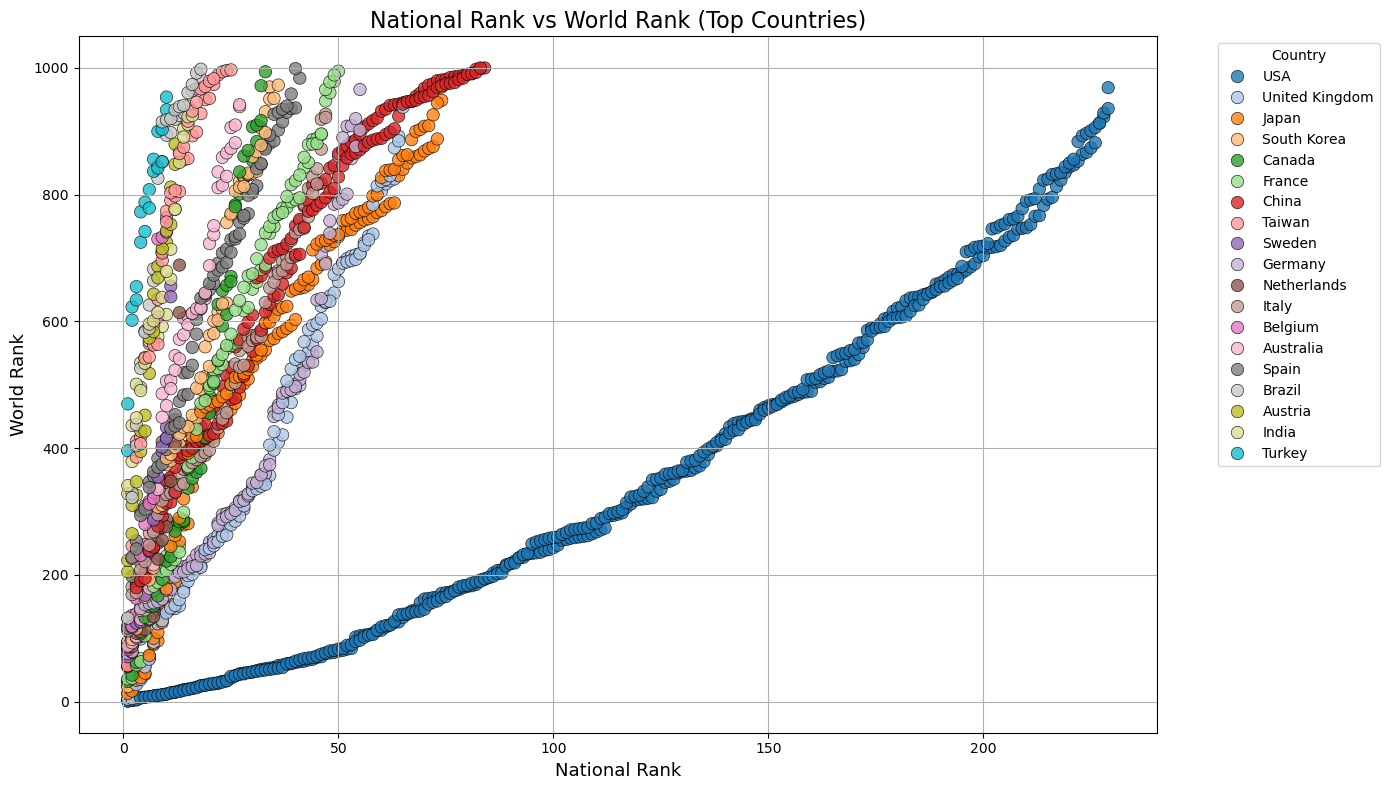

In [4]:
cwur_df[['world_rank', 'national_rank']] = cwur_df[['world_rank', 'national_rank']].apply(pd.to_numeric, errors='coerce')
cwur_df.dropna(subset=['world_rank', 'national_rank'], inplace=True)

# Group statistics by national_rank
grouped_stats = cwur_df.groupby('national_rank')['world_rank'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print("Grouped Statistics by National Rank:")
print(grouped_stats.head(10))

grouped_stats.to_csv("national_rank_grouped_world_rank_summary.csv", index=False)

# Filter top countries with most universities
top_countries = cwur_df['country'].value_counts().loc[lambda x: x >= 20].index
df_filtered = cwur_df[cwur_df['country'].isin(top_countries)]

# Define color palette and create scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_filtered, x='national_rank', y='world_rank', hue='country',
                palette=sns.color_palette("tab20", len(top_countries)), alpha=0.8,
                edgecolor='black', linewidth=0.5, s=80)

plt.title('National Rank vs World Rank (Top Countries)', fontsize=16)
plt.xlabel('National Rank', fontsize=13)
plt.ylabel('World Rank', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True)
plt.tight_layout()
plt.savefig("top_countries1.png")
plt.show()

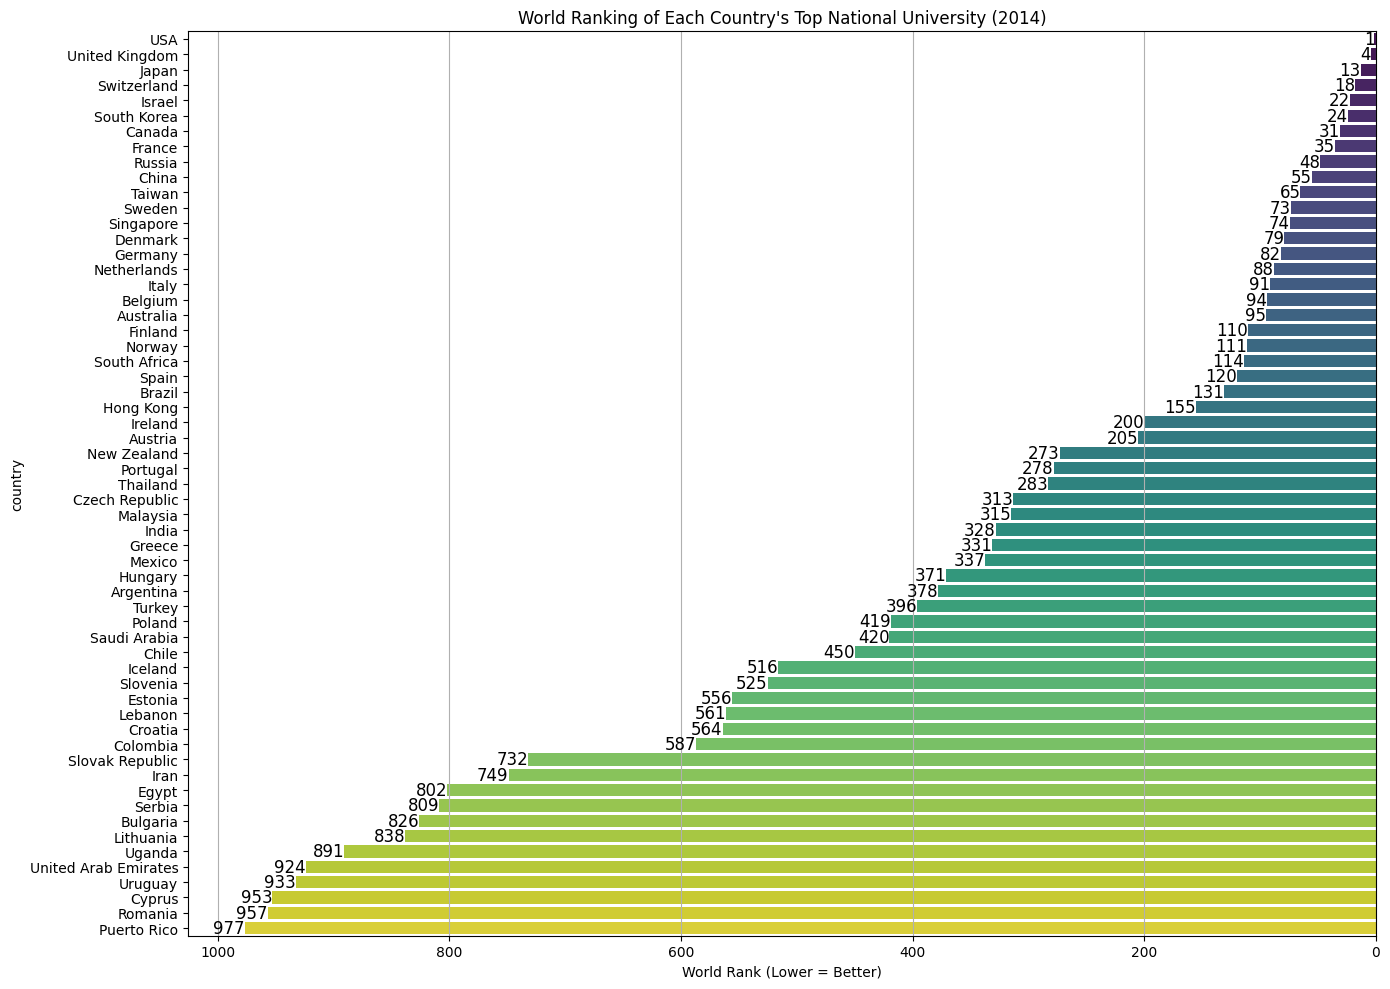

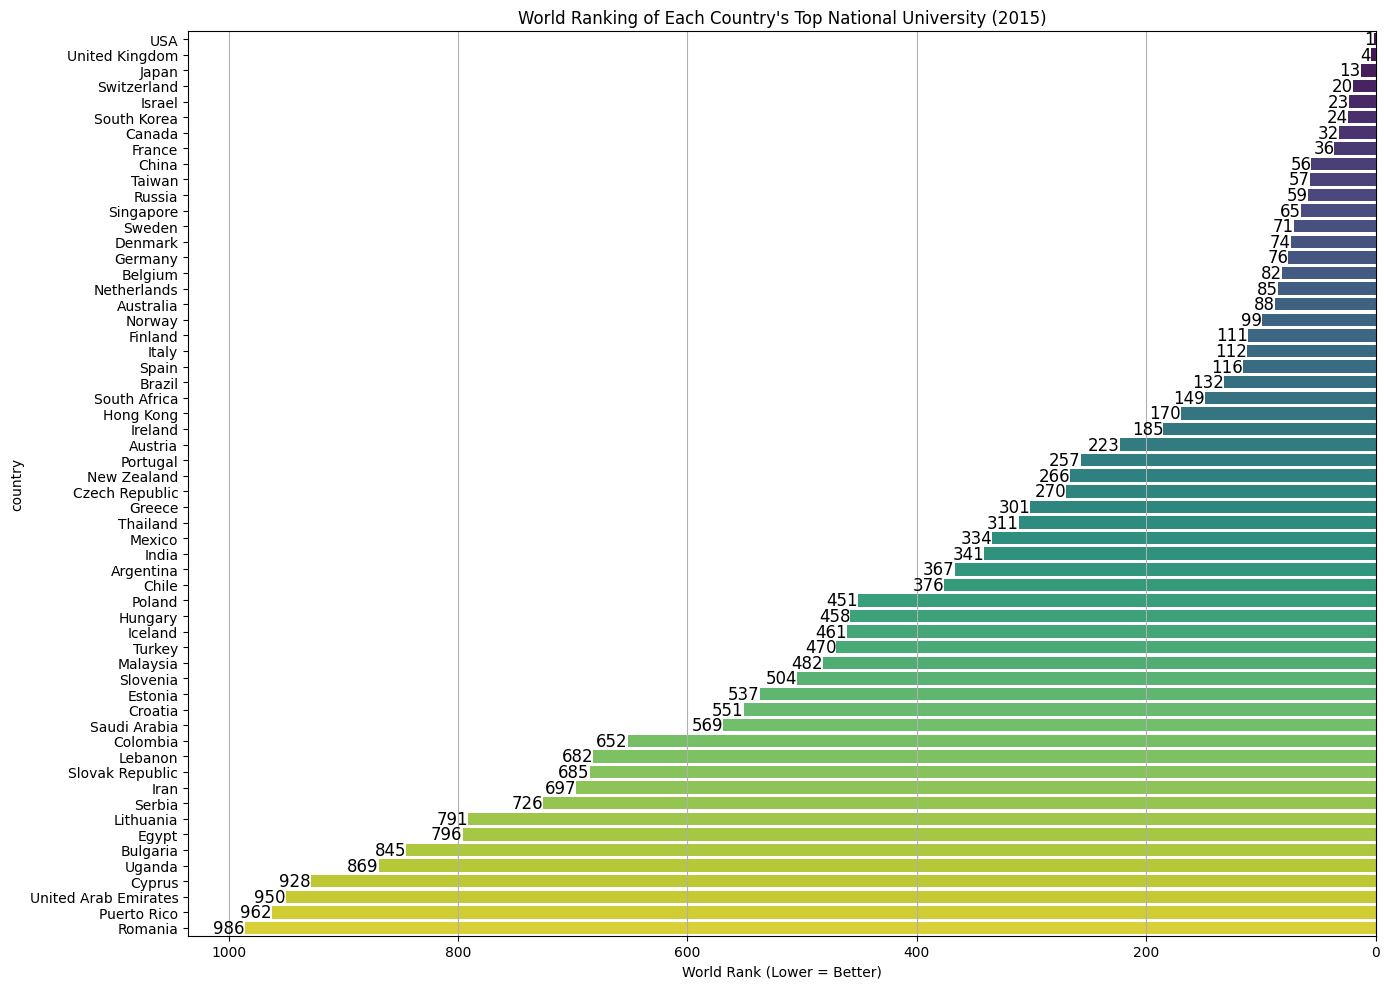

Top National Universities (2014):

             country                                     institution  world_rank  score
                 USA                              Harvard University           1 100.00
      United Kingdom                         University of Cambridge           4  97.64
               Japan                             University of Tokyo          13  80.64
         Switzerland Swiss Federal Institute of Technology in Zurich          18  72.18
              Israel                  Hebrew University of Jerusalem          22  66.76
         South Korea                       Seoul National University          24  66.06
              Canada                           University of Toronto          31  60.87
              France                √âcole normale sup√©rieure - Paris          35  59.72
              Russia               Lomonosov Moscow State University          48  56.42
               China                               Peking University          55  5

In [ ]:
# Ensure columns are numeric
cwur_df["national_rank"] = pd.to_numeric(cwur_df["national_rank"], errors="coerce")
cwur_df["world_rank"] = pd.to_numeric(cwur_df["world_rank"], errors="coerce")

# Split into two groups based on the 'year' column
df_2014 = cwur_df[cwur_df["year"] == 2014]
df_2015 = cwur_df[cwur_df["year"] == 2015]

# Filter: Only national rank 1 universities for each year
top_national_2014 = df_2014[df_2014["national_rank"] == 1].dropna(subset=["world_rank", "country", "institution"])
top_national_2015 = df_2015[df_2015["national_rank"] == 1].dropna(subset=["world_rank", "country", "institution"])

# Sort by world rank
top_national_2014 = top_national_2014.sort_values("world_rank")
top_national_2015 = top_national_2015.sort_values("world_rank")

# Save 2014 chart
fig1, ax1 = plt.subplots(figsize=(14, 10))
sns.barplot(data=top_national_2014, x="world_rank", y="country", hue="country", palette="viridis", legend=False, ax=ax1)
ax1.set_title("World Ranking of Each Country's Top National University (2014)")
ax1.invert_xaxis()
ax1.set_xlabel("World Rank (Lower = Better)")
ax1.grid(axis='x')

for bar, (index, row) in zip(ax1.patches, top_national_2014.iterrows()):
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(row["world_rank"])}',
             ha='right', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()
plt.savefig("2014.png", dpi=300)
plt.close()

# Save 2015 chart
fig2, ax2 = plt.subplots(figsize=(14, 10))
sns.barplot(data=top_national_2015, x="world_rank", y="country", hue="country", palette="viridis", legend=False, ax=ax2)
ax2.set_title("World Ranking of Each Country's Top National University (2015)")
ax2.invert_xaxis()
ax2.set_xlabel("World Rank (Lower = Better)")
ax2.grid(axis='x')

for bar, (index, row) in zip(ax2.patches, top_national_2015.iterrows()):
    ax2.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(row["world_rank"])}',
             ha='right', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()
plt.savefig("2015.png", dpi=300)
plt.close()

# Print summary tables
print("Top National Universities (2014):\n")
print(top_national_2014[["country", "institution", "world_rank", "score"]].to_string(index=False))

print("\nTop National Universities (2015):\n")
print(top_national_2015[["country", "institution", "world_rank", "score"]].to_string(index=False))

## 5. È´òÂ∞àÂà©Áî¢Âá∫ vs È´òÂ≠∏Ë°ìÂΩ±ÈüøÂäõÂ§ßÂ≠∏ÊØîËºÉ
- ÂïèÈ°åË™™ÊòéÔºöÂ§öÂ∞àÂà©ÁöÑÂ§ßÂ≠∏ÂíåÂ§öÂºïÁî®ÁöÑÂ§ßÂ≠∏ÔºåË™∞ÁöÑÊéíÂêçÈ´òÔºü
- ÂàÜÊûêÊñπÊ≥ïÔºöÂàÜÁµÑÊØîËºÉ

In [ ]:
# Select the top 25% of schools.
quantile = 0.25

In [ ]:
# Display statistical analysis.

def print_ttest(df, year):
    rank_patents = df[(df['year'] == str(year)) & (df['type'] == 'Patents')]['world_rank']
    rank_citations = df[(df['year'] == str(year)) & (df['type'] == 'Citations')]['world_rank']
    t_stat, p_val = ttest_ind(rank_patents, rank_citations)
    print(f"==== {year} Âπ¥Ë≥áÊñôÂàÜÊûê ====")
    print("Patents Âπ≥ÂùáÊéíÂêçÔºö", rank_patents.mean())
    print("Citations Âπ≥ÂùáÊéíÂêçÔºö", rank_citations.mean())
    print(f"t Áµ±Ë®àÈáè: {t_stat:.3f}")
    print(f"p ÂÄº: {p_val:.5f}\n")

==== 2014 Âπ¥Ë≥áÊñôÂàÜÊûê ====
Patents Âπ≥ÂùáÊéíÂêçÔºö 687.9848484848485
Citations Âπ≥ÂùáÊéíÂêçÔºö 736.0127551020408
t Áµ±Ë®àÈáè: -2.882
p ÂÄº: 0.00408

==== 2015 Âπ¥Ë≥áÊñôÂàÜÊûê ====
Patents Âπ≥ÂùáÊéíÂêçÔºö 694.8452380952381
Citations Âπ≥ÂùáÊéíÂêçÔºö 741.9522471910112
t Áµ±Ë®àÈáè: -2.763
p ÂÄº: 0.00590



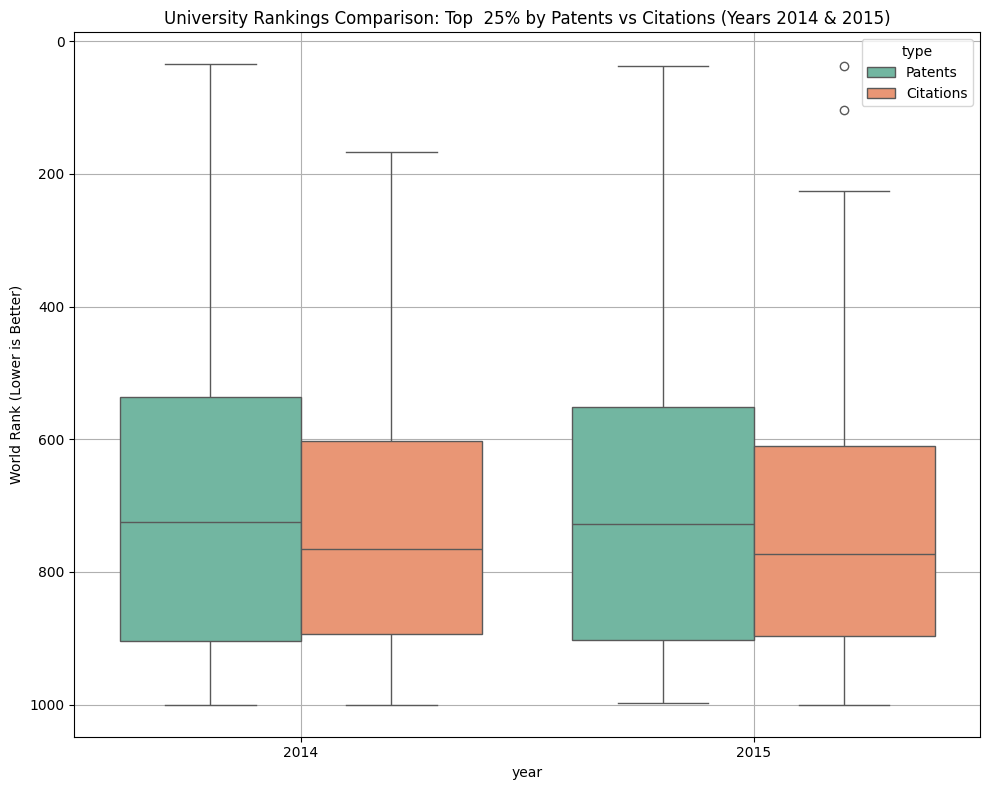

In [ ]:
group_list = []

for year in [2014, 2015]:
    for col, label in [('patents', 'Patents'), ('citations', 'Citations')]:

        # Extract the data for the specified year and sort by world_rank in ascending order
        year_df = cwur_df[cwur_df['year'] == year].sort_values(by='world_rank', ascending=True)

        # Calculate the top percentage for the given indicator.
        threshold = year_df[col].quantile(1 - quantile)

        # Filter schools with indicator values in the top percentage.
        top_col_df = year_df[year_df[col] >= threshold]

        group = pd.DataFrame({
            'world_rank': top_col_df['world_rank'],
            'type': label,
            'year': str(year)
        })
        group_list.append(group)

# Merge all data

combined_df = pd.concat(group_list, ignore_index=True)

# Output results: iterate through the years 2014 and 2015 and call the print\_ttest function to perform t-test
for year in [2014, 2015]:
    print_ttest(combined_df, year)

# Plot a multi-level labeled chart using year and type as the x-axis
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(data=combined_df, x='year', y='world_rank', hue='type', palette="Set2")
plt.ylabel('World Rank (Lower is Better)')
plt.title(f'University Rankings Comparison: Top {quantile*100: .0f}% by Patents vs Citations (Years 2014 & 2015)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Â≠∏Ë°ì vs ÂâµÊñ∞ÂûãÂ§ßÂ≠∏ÁöÑÂàÜÈ°û
- ÂïèÈ°åË™™ÊòéÔºöÊ†πÊìöË´ñÊñáÂºïÁî®„ÄÅÂ∞àÂà©Â∞áÂ§ßÂ≠∏ÂàÜÈ°û
- ÂàÜÊûêÊñπÊ≥ïÔºöÂàÜÁæ§ (Clustering)

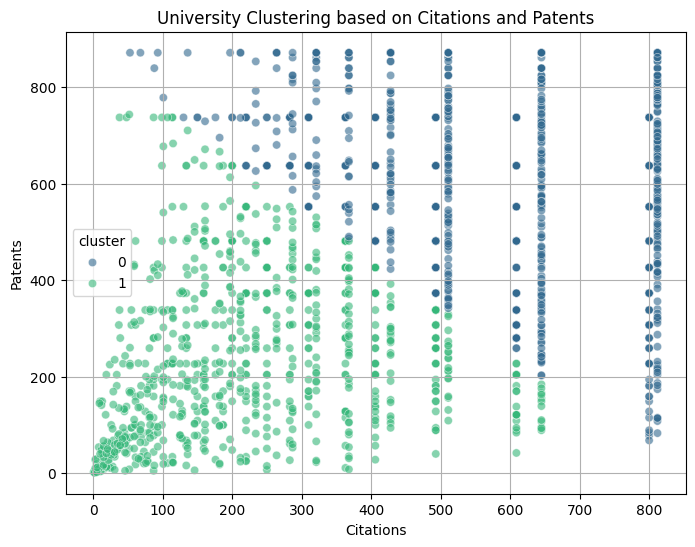


Cluster Centers (Scaled Data):
[[ 0.60682814  0.6165761 ]
 [-0.88049573 -0.89463983]]

Cluster Centers (Original Scale):
[[601.09628378 630.3597973 ]
 [229.14828431 238.10784314]]

Cluster 0 Statistics:
         citations      patents
count  1182.000000  1182.000000
mean    601.530457   630.571066
std     178.692007   180.381789
min      53.000000    68.000000
25%     493.000000   517.250000
50%     609.000000   660.500000
75%     800.000000   737.000000
max     812.000000   871.000000

Cluster 1 Statistics:
        citations     patents
count  818.000000  818.000000
mean   229.430318  238.761614
std    158.142045  164.475326
min      1.000000    1.000000
25%    101.000000  102.250000
50%    200.000000  206.500000
75%    321.000000  347.500000
max    645.000000  743.000000


In [ ]:
# Selecting relevant columns for clustering
clustering_data = cwur_df[['citations', 'patents']].dropna()

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Applying K-Means Clustering
# Let's try 2 clusters first (Academic vs Innovative)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Explicitly set n_init
clustering_data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing the clusters
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=clustering_data, x='citations', y='patents', hue='cluster', palette='viridis', alpha=0.6)
plt.xlabel('Citations')
plt.ylabel('Patents')
plt.title('University Clustering based on Citations and Patents')
plt.grid(True)
plt.show()

# Displaying the characteristics of each cluster (optional)
print("\nCluster Centers (Scaled Data):")
print(kmeans.cluster_centers_)

print("\nCluster Centers (Original Scale):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Analyze the characteristics of each cluster
print("\nCluster 0 Statistics:")
print(clustering_data[clustering_data['cluster'] == 0][['citations', 'patents']].describe())

print("\nCluster 1 Statistics:")
print(clustering_data[clustering_data['cluster'] == 1][['citations', 'patents']].describe())

<ipython-input-23-93e4f476d211>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


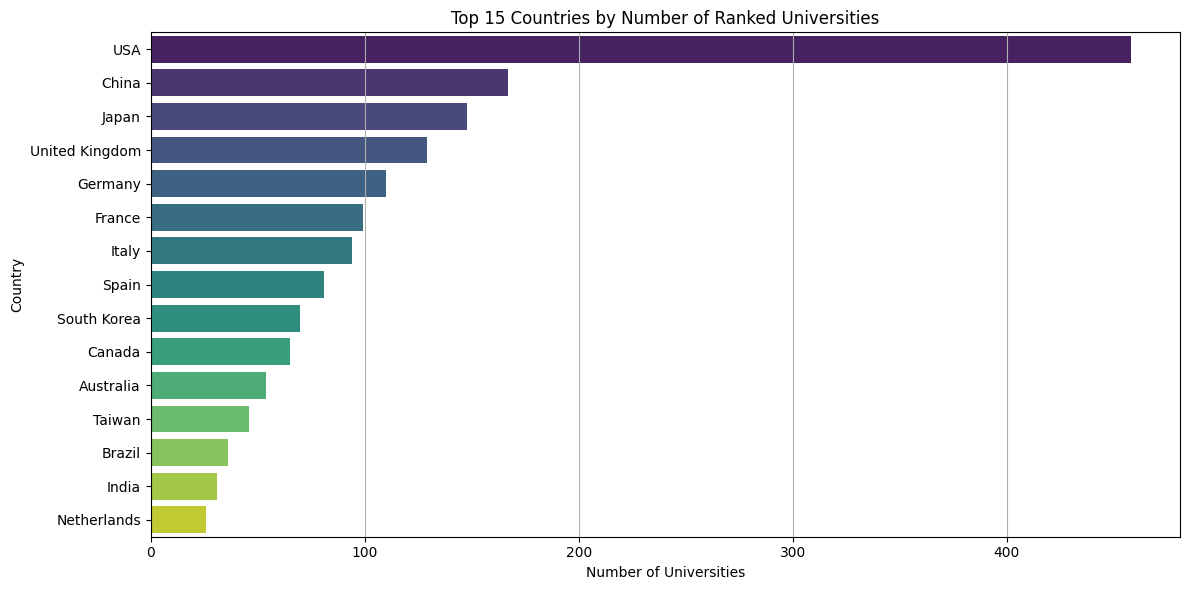

<ipython-input-23-93e4f476d211>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rank_by_country.values, y=avg_rank_by_country.index, palette="magma")


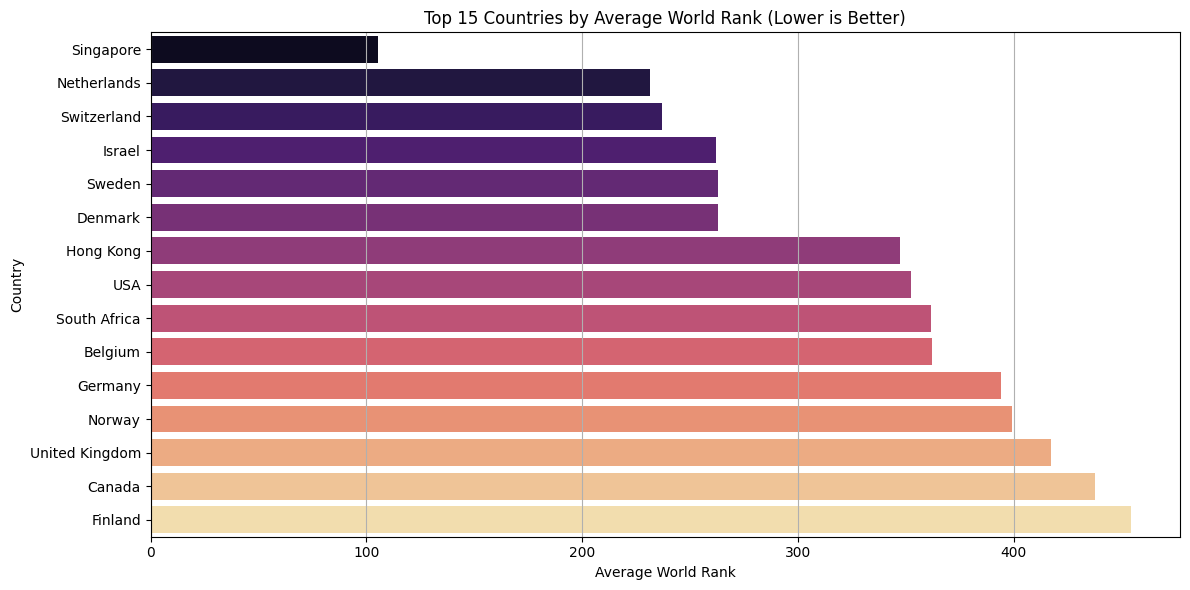

<ipython-input-23-93e4f476d211>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x='country', y='citations', palette='Set2')


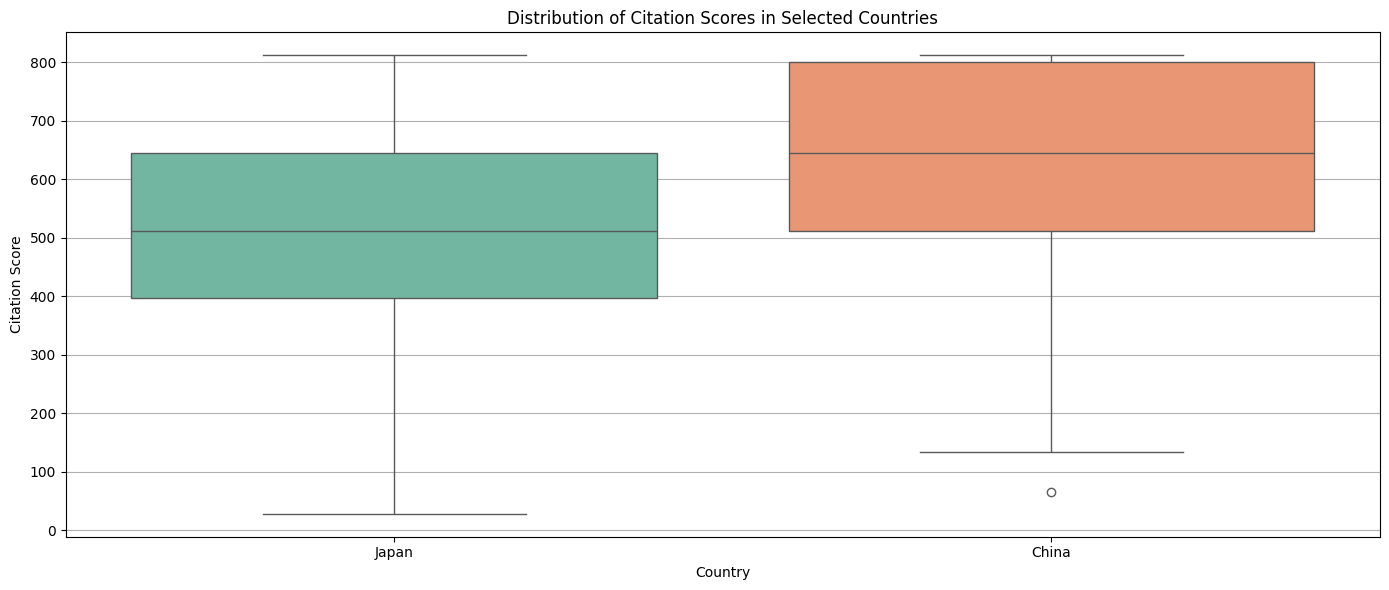

In [ ]:
# Convert ranking to numeric (in case of any non-numeric values)
cwur_df['world_rank'] = pd.to_numeric(cwur_df['world_rank'], errors='coerce')

# Top 15 countries by number of ranked universities
country_counts = cwur_df['country'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 15 Countries by Number of Ranked Universities")
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Average world rank by country (lower is better)
avg_rank_by_country = cwur_df.groupby("country")['world_rank'].mean().sort_values().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rank_by_country.values, y=avg_rank_by_country.index, palette="magma")
plt.title("Top 15 Countries by Average World Rank (Lower is Better)")
plt.xlabel("Average World Rank")
plt.ylabel("Country")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Boxplot of citation scores for selected countries
selected_countries = ['United States', 'China', 'Japan']
subset_df = cwur_df[cwur_df['country'].isin(selected_countries)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=subset_df, x='country', y='citations', palette='Set2')
plt.title("Distribution of Citation Scores in Selected Countries")
plt.ylabel("Citation Score")
plt.xlabel("Country")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Bonus 1. ÈóúÈçµÂ≠óÊï¥ÁêÜ
- Áî®ÈÄîË™™ÊòéÔºöÂ∞àÂà©Ââç 10 ÂêçÂúãÂÆ∂
- ÂàÜÊûêÊñπÊ≥ïÔºöÈóúÈçµÂ≠óÈõ≤

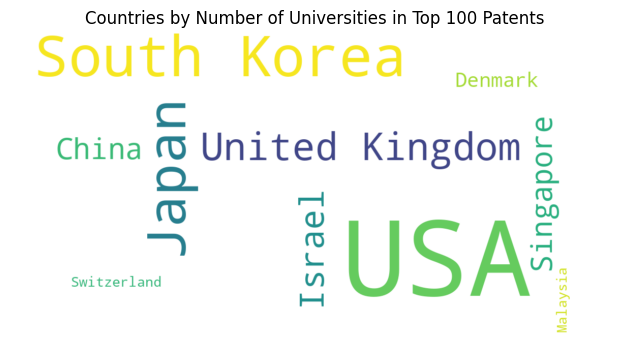

In [ ]:
top_100_by_citations = cwur_df.nsmallest(100, 'patents')
country_counts = top_100_by_citations['country'].value_counts()
# print(country_counts)

wordcloud = WordCloud(
    background_color='white',
    margin=0,
    scale=3,
    relative_scaling=0.6,
    prefer_horizontal=0.9,
    collocations=False
).generate_from_frequencies(country_counts)

# plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Countries by Number of Universities in Top 100 Patents")
plt.tight_layout()
plt.show()

## Bonus 2. ÈóúÈçµÂ≠óÊï¥ÁêÜ
- Áî®ÈÄîË™™ÊòéÔºöÂºïÁî®ÈáèÂâç 10 ÂêçÂúãÂÆ∂
- ÂàÜÊûêÊñπÊ≥ïÔºöÈóúÈçµÂ≠óÈõ≤

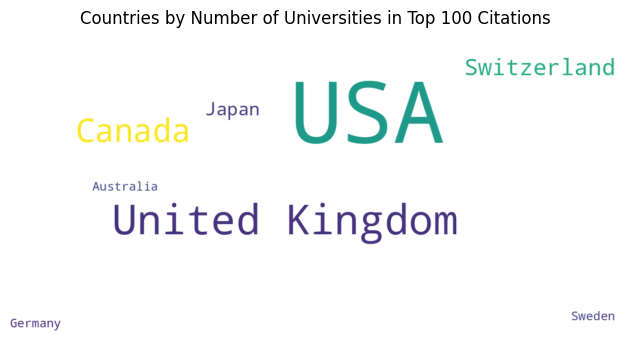

In [ ]:
top_100_by_citations = cwur_df.nsmallest(100, 'citations')
country_counts = top_100_by_citations['country'].value_counts()
# print(country_counts)

wordcloud = WordCloud(
    background_color='white',
    margin=0,
    scale=3,
    relative_scaling=0.6,
    prefer_horizontal=0.9,
    collocations=False
).generate_from_frequencies(country_counts)

# plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Countries by Number of Universities in Top 100 Citations")
plt.tight_layout()
plt.show()

## Bonus 3. Êô∫ÊÖßÂïèÁ≠î
- Áî®ÈÄîË™™ÊòéÔºöÂèñÂæóÂâç‰∏âÂêçÂ≠∏Ê†°Ôºå‰∏¶ÈÄ≤Ë°åÁ∞°‰ªãÊàñ‰ªªÊÑèÂïèÁ≠î
- ÂàÜÊûêÊñπÊ≥ïÔºöRAG + Wikipedia (Data Mining)

In [ ]:
top_universities = cwur_df['institution'].dropna().unique().tolist()[:3]

wikipedia.set_lang("en")  # ‰ΩøÁî®Ëã±ÊñáÁâà Wikipedia

def get_summary(name):
    try:
        return wikipedia.summary(name, sentences=3)
    except Exception as e:
        return f"Summary not available for {name}: {str(e)}"

# Âª∫Á´ãË≥áÊñôÈõÜ
# Prepare data in a format suitable for DataFrameLoader
data_for_loader = []
for uni in top_universities:
    summary = get_summary(uni)
    data_for_loader.append({"name": uni, "content": summary})

# Create a pandas DataFrame from the data
docs_df = pd.DataFrame(data_for_loader)

# Load the DataFrame into Langchain documents
# Using 'content' as the page_content_column and 'name' as metadata
loader = DataFrameLoader(docs_df, page_content_column="content")
langchain_docs = loader.load()

# Split documents (optional, but good practice for larger texts)
# text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
# split_docs = text_splitter.split_documents(langchain_docs)

# Define the embedding function
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# Create the vector database using Chroma
# You can specify a directory for persistence if you want to save the database
# persist_directory = 'chroma_db'
# vectordb = Chroma.from_documents(documents=langchain_docs, # Use langchain_docs or split_docs
#                                  embedding=embeddings,
#                                  persist_directory=persist_directory)

# In-memory Chroma database for simplicity in this example
vectordb = Chroma.from_documents(documents=langchain_docs, # Use langchain_docs or split_docs
                                 embedding=embeddings)


query = "Which university focuses on technology?"
results = vectordb.similarity_search(query, k=5)

for r in results:
    print(f"üî∏ {r.metadata['name']}")
    print(f"üìò {r.page_content}\n")

<ipython-input-10-5d294bc6359e>:31: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  wa

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

üî∏ Massachusetts Institute of Technology
üìò The Massachusetts Institute of Technology (MIT) is a private research university in Cambridge, Massachusetts, United States. Established in 1861, MIT has played a significant role in the development of many areas of modern technology and science.
In response to the increasing industrialization of the United States, William Barton Rogers organized a school in Boston to create "useful knowledge." Initially funded by a federal land grant, the institute adopted a polytechnic model that stressed laboratory instruction in applied science and engineering.

üî∏ Harvard University
üìò Harvard University is a private Ivy League research university in Cambridge, Massachusetts, United States. Founded October 28, 1636, and named for its first benefactor, the Puritan clergyman John Harvard, it is the oldest institution of higher learning in the United States. Its influence, wealth, and rankings have made it one of the most prestigious universities in

## Bonus 4. ÁøªË≠ØÂ∑•ÂÖ∑
- Áî®ÈÄîË™™ÊòéÔºöÂ∞áÂïèÁ≠îÈÄ≤Ë°åÁøªË≠Ø
- Âü∑Ë°åÊñπÂºèÔºöÂ∞áBonus 3ÁöÑÂïèÈ°åÈÄèÈÅé API ÁøªË≠Ø

In [ ]:
import deepl

# ‰Ω†ÁöÑ DeepL API ÈáëÈë∞ÔºàË´ãÁî®Ëá™Â∑±ÁöÑÈáëÈë∞ÊõøÊèõÔºâ
DEEPL_API_KEY = "please-use-your-api-key"
translator = deepl.Translator(DEEPL_API_KEY)
try:
    translator = deepl.Translator(DEEPL_API_KEY)
    print("DeepL Translator ÂàùÂßãÂåñÊàêÂäü„ÄÇ")

    # ÂéüÂßãÊü•Ë©¢ÔºàËã±ÊñáÔºâ
    query = "Which university focuses on technology?"

    # ÁøªË≠ØÂéüÂßãÊü•Ë©¢Êàê‰∏≠Êñá (ÈÄôÈÉ®ÂàÜÂ∑≤Á∂ìÂ≠òÂú®)
    translation = translator.translate_text(query, target_lang="ZH-HANT")
    print("üì• ÂéüÂßãÊü•Ë©¢ÔºàËã±ÊñáÔºâ:")
    print(query)
    print("\nüåè ÁøªË≠ØÊü•Ë©¢Ôºà‰∏≠ÊñáÔºâ:")
    print(translation.text)

    # Áõ∏‰ººÂ∫¶Ê™¢Á¥¢ (‰ΩøÁî®ÂéüÂßãËã±ÊñáÊü•Ë©¢ÈÄ≤Ë°åÊ™¢Á¥¢ÔºåÂõ†ÁÇ∫ vectordb ÊòØÁî®Ëã±ÊñáÂÖßÂÆπÂª∫Á´ãÁöÑ)
    print("\nüîé Áõ∏‰ººÂ∫¶Ê™¢Á¥¢ÁµêÊûúÔºö\n")

    # Ë´ãÁ¢∫Ë™ç vectordb Âú®Ê≠§‰πãÂâçÂ∑≤ÊàêÂäüÂª∫Á´ã (‰ΩçÊñºÂâç‰∏ÄÂÄã Cell)
    # Â¶ÇÊûúÂõ† DeepL ÈåØË™§Â∞éËá¥Âü∑Ë°å‰∏≠Êñ∑Ôºåvectordb ÂèØËÉΩÂ∞öÊú™Ê∫ñÂÇôÂ•Ω
    try:
        results = vectordb.similarity_search(query, k=3) # ÈÄôË£°‰ªç‰ΩøÁî®ÂéüÂßãËã±ÊñáÊü•Ë©¢
        print("ÊâæÂà∞Áõ∏‰ººÁµêÊûú„ÄÇ")
        for r in results:
            # ÁøªË≠ØÂ§ßÂ≠∏ÂêçÁ®±
            try:
                translated_name = translator.translate_text(r.metadata['name'], target_lang="ZH-HANT").text
            except Exception as e:
                translated_name = f"ÁøªË≠ØÂêçÁ®±Â§±Êïó: {e}"
                print(f"Ë≠¶Âëä: ÁøªË≠ØÂêçÁ®± '{r.metadata['name']}' ÊôÇÁôºÁîüÈåØË™§: {e}")

            # ÁøªË≠ØÊëòË¶ÅÂÖßÂÆπ
            try:
                translated_content = translator.translate_text(r.page_content, target_lang="ZH-HANT").text
            except Exception as e:
                translated_content = f"ÁøªË≠ØÂÖßÂÆπÂ§±Êïó: {e}"
                print(f"Ë≠¶Âëä: ÁøªË≠ØÂÖßÂÆπÊôÇÁôºÁîüÈåØË™§: {e}")


            print(f"üî∏ Â§ßÂ≠∏ÂêçÁ®±: {r.metadata['name']}")
            print(f"   (‰∏≠ÊñáÁøªË≠Ø: {translated_name})") # È°ØÁ§∫ÁøªË≠ØÂæåÁöÑÂêçÁ®±
            print(f"üìò ÊëòË¶ÅÂÖßÂÆπ:")
            print(r.page_content)
            print(f"   (‰∏≠ÊñáÁøªË≠Ø: {translated_content})\n") # È°ØÁ§∫ÁøªË≠ØÂæåÁöÑÂÖßÂÆπ

    except NameError:
        print("ÈåØË™§: vectordb Êú™ÂÆöÁæ©„ÄÇË´ãÁ¢∫Ë™ç‰πãÂâçÁöÑ Chroma ÂêëÈáèÁ¥¢ÂºïÂª∫Á´ãÊ≠•È©üÂ∑≤ÊàêÂäüÂü∑Ë°å„ÄÇ")
    except Exception as e:
         print(f"Ê™¢Á¥¢ÊàñËôïÁêÜÁµêÊûúÊôÇÁôºÁîüÈåØË™§: {e}")


except deepl.exceptions.AuthorizationException as e:
    print(f"DeepL ÊéàÊ¨äÈåØË™§: {e}")
    print("Ë´ãÊ™¢Êü•‰Ω†ÁöÑ DeepL API ÈáëÈë∞ÊòØÂê¶Ê≠£Á¢∫‰∏îÊúâÊïà„ÄÇ")
except Exception as e:
    print(f"DeepL ÂàùÂßãÂåñÊàñÁøªË≠ØÊôÇÁôºÁîüÂÖ∂‰ªñÈåØË™§: {e}")

DeepL Translator ÂàùÂßãÂåñÊàêÂäü„ÄÇ
üì• ÂéüÂßãÊü•Ë©¢ÔºàËã±ÊñáÔºâ:
Which university focuses on technology?

üåè ÁøªË≠ØÊü•Ë©¢Ôºà‰∏≠ÊñáÔºâ:
Âì™ÊâÄÂ§ßÂ≠∏Â∞àÊ≥®ÊñºÁßëÊäÄÔºü

üîé Áõ∏‰ººÂ∫¶Ê™¢Á¥¢ÁµêÊûúÔºö

ÊâæÂà∞Áõ∏‰ººÁµêÊûú„ÄÇ
üî∏ Â§ßÂ≠∏ÂêçÁ®±: Massachusetts Institute of Technology
   (‰∏≠ÊñáÁøªË≠Ø: È∫ªÁúÅÁêÜÂ∑•Â≠∏Èô¢)
üìò ÊëòË¶ÅÂÖßÂÆπ:
The Massachusetts Institute of Technology (MIT) is a private research university in Cambridge, Massachusetts, United States. Established in 1861, MIT has played a significant role in the development of many areas of modern technology and science.
In response to the increasing industrialization of the United States, William Barton Rogers organized a school in Boston to create "useful knowledge." Initially funded by a federal land grant, the institute adopted a polytechnic model that stressed laboratory instruction in applied science and engineering.
   (‰∏≠ÊñáÁøªË≠Ø: È∫ªÁúÅÁêÜÂ∑•Â≠∏Èô¢ (MIT) ÊòØ‰∏ÄÊâÄÁßÅÁ´ãÁ†îÁ©∂ÂûãÂ§ßÂ≠∏Ôºå‰ΩçÊñºÁæéÂúãÈ∫ªÁúÅÂäçÊ©ãÂ∏Ç„ÄÇÈ

## Bonus 5. Êï£‰ΩàÁü©Èô£Âúñ
- Áî®ÈÄîË™™ÊòéÔºöÂèØË¶ñÂåñÂ§öÂÄãËÆäÊï∏‰πãÈñìÁöÑÂÖ©ÂÖ©Èóú‰øÇËàáÂàÜÂ∏ÉÊÉÖÂΩ¢

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ËÆÄÂÖ•Ë≥áÊñô
df = pd.read_csv(file_path)

# ÈÅ∏ÂèñÊÉ≥ÂàÜÊûêÁöÑÊåáÊ®ô + ÈôêÂà∂Ââç30ÂêçÂúãÂÆ∂Ôºà‰ª•ÂÖçÈ°èËâ≤ÈÅéÂ§öÔºâ
top_countries = df['country'].value_counts().head(5).index.tolist()
filtered_df = df[df['country'].isin(top_countries)]

# ÈÅ∏ÊìáÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç + hue
selected_cols = ['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'citations', 'influence', 'patents', 'country']

# Âè™‰øùÁïôÈÅ∏ÊìáÊ¨Ñ‰ΩçÁöÑË≥áÊñô
plot_df = filtered_df[selected_cols].dropna()

# Áπ™Ë£Ω pairplot
sns.pairplot(plot_df, hue='country', corner=True)
plt.suptitle("University Metrics Pairplot by Country", y=1.02)
plt.show()
